In [99]:
import numpy as np
import csv
import datetime
import time

In [ ]:
def addElement(array, index, ele):
    if array and index < len(array):
        array[index] += ele
        return array
    newArray = [0] * (index + 1)
    if array:
        newArray[:len(array)] = array
    newArray[index] = ele
    return newArray

In [ ]:
trafficRecordsById = {}
startTime = 1433142000

with open("new.csv") as f:
    trafficRecords = csv.reader(f, delimiter=',')
    count = 0
    for trafficRecord in trafficRecords:
        if count % 100000 == 0:
            print (count / 24015249 * 100, "%")
#         if count == 30000:
#             break
        recordTime = trafficRecord[1]
        checkPointId = trafficRecord[2]
        lane = int(trafficRecord[3])
        traffic = int(trafficRecord[4])

        relativeTime = time.mktime(datetime.datetime.strptime(recordTime, "%Y-%m-%d %H:%M:%S").timetuple()) - startTime
#         print (relativeTime)
        intervalId = relativeTime // 300
#         print (intervalId)
        
        trafficRecordsForId = trafficRecordsById.get(checkPointId)
        if not trafficRecordsForId:
            trafficByLane = addElement(None, lane, traffic)
            trafficRecordsById[checkPointId] = [(intervalId, trafficByLane)]
        else:
            prevIntervalId = trafficRecordsForId[-1][0]
            prevTrafficByLane = trafficRecordsForId[-1][1]
            if (intervalId == prevIntervalId):
                trafficRecordsForId[-1] = (intervalId, addElement(prevTrafficByLane, lane, traffic))
            else:
                trafficRecordsForId.append((intervalId, addElement(None, lane, traffic)))
        count += 1
                

import pickle

pickle.dump(trafficRecordsById, open("trafficRecordsById.p", "wb"))
    

In [2]:
import pickle
trafficRecordsByIdLoaded = pickle.load(open("trafficRecordsById.p", "rb"))

In [6]:
def checkMissingSpots(checkPointId):
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    prevIndex = -1
    for trafficRecord in trafficRecordsForId:
        intervalId = trafficRecord[0]
        if intervalId != prevIndex + 1:
            print (prevIndex + 1, intervalId - 1)
        prevIndex = intervalId

running
True
plot


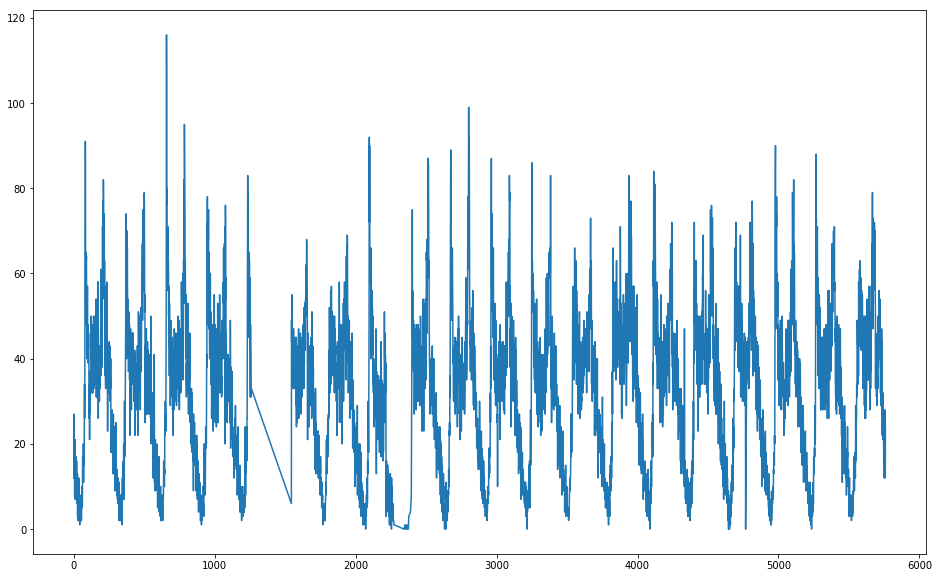

[(0.0, [6, 6]),
 (1.0, [12, 6]),
 (2.0, [16, 11]),
 (3.0, [8, 6]),
 (4.0, [10, 5]),
 (5.0, [5, 11]),
 (6.0, [4, 4]),
 (7.0, [7, 7]),
 (8.0, [11, 6]),
 (9.0, [6, 15]),
 (10.0, [3, 4]),
 (11.0, [6, 10]),
 (12.0, [8, 3]),
 (13.0, [6, 9]),
 (14.0, [6, 6]),
 (15.0, [10, 7]),
 (16.0, [7, 9]),
 (17.0, [4, 8]),
 (18.0, [3, 6]),
 (19.0, [6, 8]),
 (20.0, [11, 5]),
 (21.0, [8, 5]),
 (22.0, [4, 7]),
 (23.0, [2, 4]),
 (24.0, [5, 4]),
 (25.0, [6, 6]),
 (26.0, [7, 6]),
 (27.0, [3, 0]),
 (28.0, [3, 5]),
 (29.0, [4, 6]),
 (30.0, [1, 1]),
 (31.0, [2, 7]),
 (32.0, [3, 6]),
 (33.0, [2, 3]),
 (34.0, [6, 3]),
 (35.0, [4, 6]),
 (36.0, [6, 6]),
 (37.0, [4, 4]),
 (38.0, [3, 0]),
 (39.0, [4, 3]),
 (40.0, [2, 4]),
 (41.0, [1, 1]),
 (42.0, [0, 1]),
 (43.0, [4, 2]),
 (44.0, [2, 6]),
 (45.0, [1, 1]),
 (46.0, [2, 3]),
 (47.0, [3, 3]),
 (48.0, [5, 1]),
 (49.0, [2, 0]),
 (50.0, [1, 3]),
 (51.0, [2, 2]),
 (52.0, [4, 1]),
 (53.0, [4, 2]),
 (54.0, [2, 0]),
 (55.0, [2, 3]),
 (56.0, [4, 1]),
 (57.0, [5, 4]),
 (58.0, [5, 4]

In [74]:
import matplotlib.pyplot as plt
import bisect
def plotTrafficDistribution(checkPointId, timeRange=(None, None), plot=True):
    print ("running")
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    if trafficRecordsForId is None:
        print ("traffic records for id is None")
        return
    keys = [ele[0] for ele in trafficRecordsForId]
    
    startIntervalId = timeRange[0]
    endIntervalId = timeRange[1]

    startIndex = 0
    endIndex = len(trafficRecordsForId)
    
    if startIntervalId is not None:
        startIndex = bisect.bisect_left(keys, startIntervalId)
    
    if endIntervalId is not None:
        endIndex = bisect.bisect_right(keys, endIntervalId)
        
    print (plot)
    if plot:
        print ("plot")
        x, y = zip(*((ele[0], sum(ele[1])) for ele in trafficRecordsForId[startIndex: endIndex]))

        plt.figure(figsize=(16, 10))
        plt.plot(x, y)
        plt.show()
        
    return trafficRecordsForId[startIndex: endIndex]
    
plotTrafficDistribution("110", plot=True)    
    

In [7]:
checkMissingSpots("109")

0 475.0
477.0 712.0
714.0 860.0
862.0 872.0
874.0 2221.0
2223.0 2424.0
2426.0 2431.0
2433.0 2436.0
2438.0 2779.0
2781.0 4201.0
4203.0 4338.0
4340.0 4686.0
4688.0 5001.0
5003.0 5191.0
5193.0 5649.0
5651.0 5717.0
5719.0 5726.0


In [177]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

def mape(y_true, y_pred):
    yTrueFiltered = []
    yPredFiltered = []
    
    for index, trueValue in enumerate(y_true):
        if trueValue < 5:
            continue
        yTrueFiltered.append(trueValue)
        yPredFiltered.append(y_pred[index])
        
    yTrueFiltered = np.array(yTrueFiltered)
    yPredFiltered = np.array(yPredFiltered)
    return np.mean(np.abs((yTrueFiltered - yPredFiltered) / yTrueFiltered) * 100)

def intervalToRecords(trafficRecordsForId):
    intervalToRecordsMap = {}
    for trafficRecord in trafficRecordsForId:
        intervalToRecordsMap[trafficRecord[0]] = trafficRecord[1]
    return intervalToRecordsMap

def getTrafficRecordDefaultNone(intervalToRecordsMap, intervalId, missingDataMap):
    return sum(intervalToRecordsMap.get(intervalId)) if intervalToRecordsMap.get(intervalId) is not None else missingDataMap.get(intervalId % 288)

def imputeMissingData(trafficRecordsForId):
    missingDataMap = {}
    for trafficRecord in trafficRecordsForId:
        if (trafficRecord[0] % 288) not in missingDataMap:
            missingDataMap[trafficRecord[0] % 288] = [sum(trafficRecord[1])]
        else:
            missingDataMap[trafficRecord[0] % 288].append(sum(trafficRecord[1]))
    for key, valueList in missingDataMap.items():
        missingDataMap[key] = sum(valueList) / len(valueList)
    return missingDataMap

daysLookBack = 7
splitIntervalId = 288 * 16 - 1
def createDatasetSinglePoint(checkPointId):
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    missingDataMap = imputeMissingData(trafficRecordsForId)
    intervalToRecordsMap = intervalToRecords(trafficRecordsForId)
    X_train = []
    y_train = []
    
    X_test = []
    y_test = []
    print ("length of trafficRecordsForId", len(trafficRecordsForId))
    for trafficRecord in trafficRecordsForId:
        intervalId = trafficRecord[0]
        timeInterval = (intervalId % (288 * 7)) // 288
        toAppend = [timeInterval]
#         for i in (0, 7):
        for i in range(daysLookBack):
            if intervalId <= splitIntervalId:
                intervalWrappedAround0 = (intervalId - i * 288 - 0) % (splitIntervalId + 1)
                intervalWrappedAround1 = (intervalId - i * 288 - 1) % (splitIntervalId + 1)
                intervalWrappedAround2 = (intervalId - i * 288 - 2) % (splitIntervalId + 1)
                intervalWrappedAround3 = (intervalId - i * 288 - 3) % (splitIntervalId + 1)
                intervalWrappedAround4 = (intervalId - i * 288 - 4) % (splitIntervalId + 1)
            else:
                intervalWrappedAround0 = (intervalId - i * 288 - 0)
                intervalWrappedAround1 = (intervalId - i * 288 - 1)
                intervalWrappedAround2 = (intervalId - i * 288 - 2)
                intervalWrappedAround3 = (intervalId - i * 288 - 3)
                intervalWrappedAround4 = (intervalId - i * 288 - 4)

            traffic1 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround1, missingDataMap)
            traffic2 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround2, missingDataMap)
            traffic3 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround3, missingDataMap)
            traffic4 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround4, missingDataMap)
            
            trafficDelta1 = (traffic1 - traffic2) if None not in (traffic1, traffic2) else None
            trafficDelta2 = (traffic2 - traffic3) if None not in (traffic2, traffic3) else None
            trafficDelta3 = (traffic3 - traffic4) if None not in (traffic3, traffic4) else None
            
            toAppend.extend([traffic1, traffic2, traffic3, traffic4, trafficDelta1, trafficDelta2, trafficDelta3])
            
            if i != 0:
                traffic0 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround0, missingDataMap)
                toAppend.append(traffic0)

#         print (traffic1, traffic2, traffic3)
        if None in toAppend:
            print ("toAppend", toAppend)
            continue
#         print (len(toAppend))
        if intervalId <= splitIntervalId:
            y_train.append(sum(trafficRecord[1]))
            X_train.append(toAppend)
        else:
            y_test.append(sum(trafficRecord[1]))
            X_test.append(toAppend)
    return X_train, y_train, X_test, y_test

def createDatasetWithSurroundingPoints(checkPointId, additionalPoints):
    additionalPoints.append(checkPointId)
    trafficRecords = list(map(trafficRecordsByIdLoaded.get, additionalPoints))
    intervalToRecordsMapsSurroundings = list(map(intervalToRecords, trafficRecords))
    missingDataMapsSurroundings = list(map(imputeMissingData, trafficRecords))
    print ("intervalToRecordsMapsSurroundings", len(intervalToRecordsMapsSurroundings), \
            "missingDataMapsSurroundings", len(missingDataMapsSurroundings))
    X_train = []
    y_train = []
    
    X_test = []
    y_test = []
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    for trafficRecord in trafficRecordsForId:
        intervalId = trafficRecord[0]
        timeInterval = (intervalId % (288 * 7)) // 288
        toAppend = [timeInterval]
#         for i in (0, 7):
        for i in range(daysLookBack):
            if intervalId <= splitIntervalId:
                intervalWrappedAround0 = (intervalId - i * 288 - 0) % (splitIntervalId + 1)
                intervalWrappedAround1 = (intervalId - i * 288 - 1) % (splitIntervalId + 1)
                intervalWrappedAround2 = (intervalId - i * 288 - 2) % (splitIntervalId + 1)
                intervalWrappedAround3 = (intervalId - i * 288 - 3) % (splitIntervalId + 1)
                intervalWrappedAround4 = (intervalId - i * 288 - 4) % (splitIntervalId + 1)
            else:
                intervalWrappedAround0 = (intervalId - i * 288 - 0)
                intervalWrappedAround1 = (intervalId - i * 288 - 1)
                intervalWrappedAround2 = (intervalId - i * 288 - 2)
                intervalWrappedAround3 = (intervalId - i * 288 - 3)
                intervalWrappedAround4 = (intervalId - i * 288 - 4)

            for j in range(len(intervalToRecordsMapsSurroundings)):
                intervalToRecordsMapSurroundings = intervalToRecordsMapsSurroundings[j]
                missingDataMapSurroundings = missingDataMapsSurroundings[j]
                traffic0 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround0, missingDataMapSurroundings)
                traffic1 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround1, missingDataMapSurroundings)
                traffic2 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround2, missingDataMapSurroundings)
                traffic3 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround3, missingDataMapSurroundings)
                traffic4 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround4, missingDataMapSurroundings)

                trafficDelta0 = traffic0 - traffic1 if None not in (traffic0, traffic1) else None
                trafficDelta1 = traffic1 - traffic2 if None not in (traffic1, traffic2) else None
                trafficDelta2 = traffic2 - traffic3 if None not in (traffic2, traffic3) else None
                trafficDelta3 = traffic3 - traffic4 if None not in (traffic3, traffic4) else None

                toAppend.extend([traffic1, traffic2, traffic3, traffic4, trafficDelta1, trafficDelta2, trafficDelta3])
            
                if i != 0:
                    toAppend.append(traffic0)
                    toAppend.append(trafficDelta0)

#         print (traffic1, traffic2, traffic3)
        if None in toAppend:
            print ("toAppend", toAppend)
            continue
#         print (len(toAppend))
        if intervalId <= splitIntervalId:
            y_train.append(sum(trafficRecord[1]))
            X_train.append(toAppend)
        else:
            y_test.append(sum(trafficRecord[1]))
            X_test.append(toAppend)
    return X_train, y_train, X_test, y_test

def gbm(checkPointId, additionalPoints):
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
#     X_train, y_train, X_test, y_test = createDatasetSinglePoint(checkPointId)
    X_train, y_train, X_test, y_test = createDatasetWithSurroundingPoints(checkPointId, additionalPoints)
    print ("Length of X_train", len(X_train), "Length of X_test", len(X_test))
#     print (y_train)
#     splitPoint = len(trafficRecordsForId) // 10 * 8
#     X_train, X_test = X[:splitPoint], X[splitPoint:]
#     y_train, y_test = y[:splitPoint], y[splitPoint:]
    est = GradientBoostingRegressor(n_estimators=300, learning_rate=0.02,
        max_depth=7, loss='ls').fit(X_train, y_train)
#     print (mape(y_test, est.predict(X_test)))
#     print (mean_squared_error(y_test, est.predict(X_test)))
    return (mape(y_test, est.predict(X_test)))
print (gbm("405", []))


intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4205 Length of X_test 1147
13.4742418283


In [80]:
def compareRecord(records0, records1):
    if len(records0) != len(records1):
        return False
    for i in range(len(records0)):
        if records0[i][0] != records1[i][0] or records0[i][1] != records1[i][1]:
            return False
    return True

records0 = trafficRecordsByIdLoaded.get("110")
records1 = trafficRecordsByIdLoaded.get("609")

compareRecord(records0, records1)

True

In [82]:
sameRecordsReference = {}

def dedupeRecords():
    for sensorId0, records0 in trafficRecordsByIdLoaded.items():
        for sensorId1, records1 in trafficRecordsByIdLoaded.items():
            if sensorId0 >= sensorId1 or sensorId1 in sameRecordsReference:
                continue
            if compareRecord(records0, records1):
                sameRecordsReference[sensorId1] = sensorId0
    return sameRecordsReference

110


In [88]:
def retrieveRoot(sensorId, sameRecordsReference):
    if sensorId not in sameRecordsReference:
        return sensorId
    return retrieveRoot(sameRecordsReference[sensorId], sameRecordsReference)

def aggregateIds(sameRecordsReference):
    idsAggregatedIfSame = {}
    for sensorId in trafficRecordsByIdLoaded.keys():
        root = retrieveRoot(sensorId, sameRecordsReference)
        if root not in idsAggregatedIfSame:
            idsAggregatedIfSame[root] = {sensorId}
        else:
            idsAggregatedIfSame[root].add(sensorId)
    return idsAggregatedIfSame


def getAggregateIdsMap():
    return (aggregateIds(dedupeRecords()))


In [92]:
def extractValidDataPoints(thresholdPercent):
    threshold = thresholdPercent * 20 * 288
    aggregatedMap = getAggregateIdsMap()
    validIds = []
    for sensorId, records in trafficRecordsByIdLoaded.items():
        if len(records) > threshold:
            if sensorId not in aggregatedMap:
                print (sensorId, "is duplication!")
            else:
                validIds.append(sensorId)
        else:
            print (sensorId, "skipped because it's below threshold.")
    return validIds
print ("total", len(extractValidDataPoints(0.9)))

803 skipped because it's below threshold.
606 is duplication!
308 skipped because it's below threshold.
109 skipped because it's below threshold.
706 is duplication!
608 is duplication!
712 is duplication!
814 is duplication!
813 is duplication!
807 is duplication!
714 is duplication!
802 is duplication!
310 is duplication!
713 is duplication!
812 is duplication!
507 is duplication!
609 is duplication!
602 is duplication!
205 skipped because it's below threshold.
711 is duplication!
815 is duplication!
515 is duplication!
801 is duplication!
705 is duplication!
516 is duplication!
total 50


In [178]:
validIds = extractValidDataPoints(0.9)
mapeMap = {}
for sensorId in validIds:
    mapeMap[sensorId] = gbm(sensorId, [])
print (mapeMap)
pickle.dump(mapeMap, open("mapeMap.p", "wb"))

803 skipped because it's below threshold.
606 is duplication!
308 skipped because it's below threshold.
109 skipped because it's below threshold.
706 is duplication!
608 is duplication!
712 is duplication!
814 is duplication!
813 is duplication!
807 is duplication!
714 is duplication!
802 is duplication!
310 is duplication!
713 is duplication!
812 is duplication!
507 is duplication!
609 is duplication!
602 is duplication!
205 skipped because it's below threshold.
711 is duplication!
815 is duplication!
515 is duplication!
801 is duplication!
705 is duplication!
516 is duplication!
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4199 Length of X_test 1147
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4201 Length of X_test 1147
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4190 Length of X_test 1147
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_t

In [182]:
mapeMapLoaded = pickle.load(open("mapeMap.p", "rb"))
print ("avg unfiltered", sum(mapeMapLoaded.values()) / len(mapeMapLoaded.values()))

mapeMapValuesFiltered = []
for sensorId, mapeValue in mapeMapLoaded.items():
    if mapeValue > 50:
        print (sensorId, "'s mape lager than 50")
    else:
        mapeMapValuesFiltered.append(mapeValue)
        
print ("avg filtered", sum(mapeMapValuesFiltered) / len(mapeMapValuesFiltered))

avg unfiltered 27.88895001
401 's mape lager than 50
509 's mape lager than 50
412 's mape lager than 50
202 's mape lager than 50
avg filtered 18.4054653888


trafficRecordsForId[-1][0] 5759.0
dataset.shape (5759, 1)
Epoch 1/1
81s - loss: 0.0145
Epoch 1/1
79s - loss: 0.0107
Epoch 1/1
78s - loss: 0.0091
Epoch 1/1
77s - loss: 0.0082
Epoch 1/1
81s - loss: 0.0078
Epoch 1/1
87s - loss: 0.0075
Epoch 1/1
86s - loss: 0.0074
Epoch 1/1
84s - loss: 0.0073
Epoch 1/1
85s - loss: 0.0072
Epoch 1/1
79s - loss: 0.0072
Epoch 1/1
79s - loss: 0.0071
Epoch 1/1
79s - loss: 0.0070
Epoch 1/1
79s - loss: 0.0069
Epoch 1/1
79s - loss: 0.0068
Epoch 1/1
79s - loss: 0.0067
Epoch 1/1
81s - loss: 0.0067
Epoch 1/1
78s - loss: 0.0067
Epoch 1/1
78s - loss: 0.0067
Epoch 1/1
77s - loss: 0.0067
Epoch 1/1
78s - loss: 0.0067
Epoch 1/1
78s - loss: 0.0067
Epoch 1/1
80s - loss: 0.0068
Epoch 1/1
80s - loss: 0.0068
Epoch 1/1
81s - loss: 0.0072
Epoch 1/1
79s - loss: 0.0067
Epoch 1/1
79s - loss: 0.0066
Epoch 1/1
79s - loss: 0.0066
Epoch 1/1
79s - loss: 0.0067
Epoch 1/1
79s - loss: 0.0067
Epoch 1/1
79s - loss: 0.0086
Epoch 1/1
79s - loss: 0.0073
Epoch 1/1
79s - loss: 0.0072
Epoch 1/1
79s 

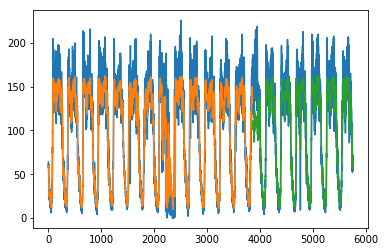

In [19]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

dataset = []
trafficRecordsForId = trafficRecordsByIdLoaded.get("405")
missingDataMap = imputeMissingData(trafficRecordsForId)
intervalToRecordsMap = intervalToRecords(trafficRecordsForId)
print ("trafficRecordsForId[-1][0]", trafficRecordsForId[-1][0])
for i in range(int(trafficRecordsForId[-1][0])):
    record = getTrafficRecordDefaultNone(intervalToRecordsMap, i, missingDataMap)
    if record is None:
        continue
    dataset.append([record])
dataset = np.array(dataset)
print ("dataset.shape", dataset.shape)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
# print (trainX)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print ('MAPE: ', mape(testY[0], testPredict[:,0]))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [108]:
import csv
sensorWithSurroundings = {}
with open("listofsensor.csv") as f:
    sensorWithSurrondings = csv.reader(f, delimiter=',')
    for l in sensorWithSurrondings:
        sensorWithSurroundings[l[0]] = [ele for ele in l[1:] if ele]
print (sensorWithSurroundings)

{'511': ['504', '509'], '513': ['405', '514', '704', '412'], '206': ['804', '207'], '307': ['104', '113'], '704': ['406', '401', '512', '513'], '505': ['415', '414'], '110': ['102', '103', '603'], '504': ['503', '511', '415'], '213': ['204', '215', '206', '804'], '309': ['210', '301'], '407': ['406', '704', '512'], '401': ['402', '708'], '604': ['101', '102'], '408': ['413', '409'], '509': ['502', '511'], '217': ['512', '704', '207'], '405': ['513', '514', '406', '704'], '409': ['408'], '514': ['513', '707', '409'], '207': ['206', '804', '407'], '111': ['113', '603'], '210': ['301', '309', '209'], '413': ['412', '710'], '204': ['203', '807', '213', '215'], '203': ['202', '204'], '103': ['603', '104', '113'], '201': ['310', '209', '202'], '402': ['401', '708'], '209': ['210', '201', '2'], '102': ['604', '110', '603'], '113': ['111', '103', '104'], '707': ['514', '708'], '310': ['201'], '804': ['206', '207'], '301': ['210', '309'], '104': ['307', '103', '113'], '215': ['213', '216', '204

In [112]:
validIds = extractValidDataPoints(0.9)
mapeMapWithSurroundings = {}
for sensorId, surrounding in sensorWithSurroundings.items():
    mapeMapWithSurroundings[sensorId] = gbm(sensorId, surrounding)
print (mapeMapWithSurroundings)
pickle.dump(mapeMapWithSurroundings, open("mapeMapWithSurroundings.p", "wb"))

803 skipped because it's below threshold.
606 is duplication!
308 skipped because it's below threshold.
109 skipped because it's below threshold.
706 is duplication!
608 is duplication!
712 is duplication!
814 is duplication!
813 is duplication!
807 is duplication!
714 is duplication!
802 is duplication!
310 is duplication!
713 is duplication!
812 is duplication!
507 is duplication!
609 is duplication!
602 is duplication!
205 skipped because it's below threshold.
711 is duplication!
815 is duplication!
515 is duplication!
801 is duplication!
705 is duplication!
516 is duplication!
length of trafficRecordsForId 5346
Length of X_train 4199 Length of X_test 1147
length of trafficRecordsForId 5348
Length of X_train 4201 Length of X_test 1147
length of trafficRecordsForId 5303
Length of X_train 4156 Length of X_test 1147
length of trafficRecordsForId 5345
Length of X_train 4198 Length of X_test 1147
length of trafficRecordsForId 5429
Length of X_train 4282 Length of X_test 1147
length of tr

In [113]:
mapeMapWithSurroundingsLoaded = pickle.load(open("mapeMapWithSurroundings.p", "rb"))
print ("avg unfiltered", sum(mapeMapWithSurroundingsLoaded.values()) / len(mapeMapWithSurroundingsLoaded.values()))

mapeMapWithSurroundingsLoadedFiltered = []
for sensorId, mapeValue in mapeMapWithSurroundingsLoaded.items():
    if mapeValue > 50:
        print (sensorId, "'s mape lager than 50")
    else:
        mapeMapWithSurroundingsLoadedFiltered.append(mapeValue)
        
print ("avg filtered", sum(mapeMapWithSurroundingsLoadedFiltered) / len(mapeMapWithSurroundingsLoadedFiltered))

avg unfiltered 25.4056704399
401 's mape lager than 50
509 's mape lager than 50
207 's mape lager than 50
310 's mape lager than 50
412 's mape lager than 50
avg filtered 18.8781071753


In [181]:
def convertToTimeSeries():
    with open('ts.csv','w') as f:
        for sensorId, trafficRecordsForId in trafficRecordsByIdLoaded.items():
            for record in trafficRecordsForId:
                f.write(",".join([str(int(sensorId)), str(int(record[0])), str(int(sum(record[1])))]) + "\n")
                
convertToTimeSeries()